## Cleaning up the Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import datetime
import pandas as pd
import matplotlib.pyplot as plot
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import *
from sklearn.svm import SVC

#Reading in dataframe from csv
df = pd.read_csv("animal_shelter_18414616.csv")

In [2]:
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Outcome
0,A751682,Laia,06/26/2017 06:11:00 PM,06/26/2017 06:11:00 PM,10/11/2014,Dog,Spayed Female,2 years,Plott Hound/Dachshund,Brown,0
1,A709694,NaN,08/12/2015 01:19:00 PM,08/12/2015 01:19:00 PM,08/12/2014,Cat,Intact Female,1 year,Domestic Shorthair Mix,Brown Tabby,1
2,A681401,NaN,06/18/2014 02:09:00 PM,06/18/2014 02:09:00 PM,05/01/2014,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,0
3,A767432,Chica,05/21/2019 01:11:00 PM,05/21/2019 01:11:00 PM,02/28/2016,Dog,Spayed Female,3 years,Chihuahua Shorthair Mix,Black/Brown,0
4,A548156,Tank,02/25/2014 01:48:00 PM,02/25/2014 01:48:00 PM,07/29/2008,Dog,Neutered Male,5 years,Pit Bull Mix,Blue/White,0


In [3]:
#Checking data types of each column
df.dtypes

Animal ID           object
Name                object
DateTime            object
MonthYear           object
Date of Birth       object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
Outcome              int64
dtype: object

In [4]:
#Convert object columns to category
for column in df.select_dtypes(['object']).columns:
    df[column] = df[column].astype('category')
df.dtypes

Animal ID           category
Name                category
DateTime            category
MonthYear           category
Date of Birth       category
Animal Type         category
Sex upon Outcome    category
Age upon Outcome    category
Breed               category
Color               category
Outcome                int64
dtype: object

In [5]:
# Clean the column names to remove white space after or in the name
df.columns = df.columns.str.replace(' ', '')

In [6]:
#Checking how many entries per column are empty or not defined
for column in df.columns:
    print(column, df[column].isnull().sum())

AnimalID 0
Name 1546
DateTime 0
MonthYear 0
DateofBirth 0
AnimalType 0
SexuponOutcome 0
AgeuponOutcome 2
Breed 0
Color 0
Outcome 0


In [7]:
#Dropping Name column since it isn't a relevant attribute to classifying whether an animal gets adopted or not 
df = df.drop(columns = ["Name"])
df.head()

,AnimalID,DateTime,MonthYear,DateofBirth,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Outcome
0,A751682,06/26/2017 06:11:00 PM,06/26/2017 06:11:00 PM,10/11/2014,Dog,Spayed Female,2 years,Plott Hound/Dachshund,Brown,0
1,A709694,08/12/2015 01:19:00 PM,08/12/2015 01:19:00 PM,08/12/2014,Cat,Intact Female,1 year,Domestic Shorthair Mix,Brown Tabby,1
2,A681401,06/18/2014 02:09:00 PM,06/18/2014 02:09:00 PM,05/01/2014,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,0
3,A767432,05/21/2019 01:11:00 PM,05/21/2019 01:11:00 PM,02/28/2016,Dog,Spayed Female,3 years,Chihuahua Shorthair Mix,Black/Brown,0
4,A548156,02/25/2014 01:48:00 PM,02/25/2014 01:48:00 PM,07/29/2008,Dog,Neutered Male,5 years,Pit Bull Mix,Blue/White,0


In [8]:
#The DateTime and MonthYear columns are identical, meaning we can drop MonthYear as it has a less descriptive name
df["DateTime"].equals(df["MonthYear"])

True

In [9]:
#Dropping MonthYear column
df = df.drop(columns = ["MonthYear"])
df.head()

,AnimalID,DateTime,DateofBirth,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Outcome
0,A751682,06/26/2017 06:11:00 PM,10/11/2014,Dog,Spayed Female,2 years,Plott Hound/Dachshund,Brown,0
1,A709694,08/12/2015 01:19:00 PM,08/12/2014,Cat,Intact Female,1 year,Domestic Shorthair Mix,Brown Tabby,1
2,A681401,06/18/2014 02:09:00 PM,05/01/2014,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,0
3,A767432,05/21/2019 01:11:00 PM,02/28/2016,Dog,Spayed Female,3 years,Chihuahua Shorthair Mix,Black/Brown,0
4,A548156,02/25/2014 01:48:00 PM,07/29/2008,Dog,Neutered Male,5 years,Pit Bull Mix,Blue/White,0


In [10]:
#Printing rows that have null values present
print(df[df.isnull().any(axis=1)])

     AnimalID                DateTime DateofBirth AnimalType SexuponOutcome  \
1923  A842320  09/14/2021 02:45:00 PM  09/14/2017        Cat  Intact Female   
2648  A839233  07/19/2021 08:59:00 AM  07/19/2020        Dog  Intact Female   

     AgeuponOutcome               Breed         Color  Outcome  
1923            NaN  Domestic Shorthair  Torbie/White        1  
2648            NaN            Pit Bull   Black/White        1  


In [11]:
# Since there is only 2 missing AgeuponOutcome values, we can fill them in manually using the difference between DateTime
# and DateofBirth. 

#The difference for A842320 is 4 years and the difference for A839233 is 1 year. Hence we can change the cell manually knowing
#the row and column indexes
df.iat[1923, 5] = "4 years"
df.iat[2648, 5] = "1 year"

#Displaying the changes in the rows 
print(df[df['AnimalID'] == "A842320"])
print(df[df['AnimalID'] == "A839233"])

     AnimalID                DateTime DateofBirth AnimalType SexuponOutcome  \
1923  A842320  09/14/2021 02:45:00 PM  09/14/2017        Cat  Intact Female   

     AgeuponOutcome               Breed         Color  Outcome  
1923        4 years  Domestic Shorthair  Torbie/White        1  
     AnimalID                DateTime DateofBirth AnimalType SexuponOutcome  \
2648  A839233  07/19/2021 08:59:00 AM  07/19/2020        Dog  Intact Female   

     AgeuponOutcome     Breed        Color  Outcome  
2648         1 year  Pit Bull  Black/White        1  


In [12]:
#When we try to print the rows with null values we get an empty frame, meaning that no null values are present in out dataset.
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [AnimalID, DateTime, DateofBirth, AnimalType, SexuponOutcome, AgeuponOutcome, Breed, Color, Outcome]
Index: []


In [13]:
#Converting Age upon Outcome to days for normalizing later. This is achieved by taking the difference between DateTime 
#and DateofBirth which evaluates to the AgeuponOutcome in the data frame.
df["AgeuponOutcome"] = (pd.to_datetime(df["DateTime"]) - pd.to_datetime(df["DateofBirth"])).apply(lambda i: i.days)
df.head()

,AnimalID,DateTime,DateofBirth,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Outcome
0,A751682,06/26/2017 06:11:00 PM,10/11/2014,Dog,Spayed Female,989,Plott Hound/Dachshund,Brown,0
1,A709694,08/12/2015 01:19:00 PM,08/12/2014,Cat,Intact Female,365,Domestic Shorthair Mix,Brown Tabby,1
2,A681401,06/18/2014 02:09:00 PM,05/01/2014,Cat,Intact Male,48,Domestic Shorthair Mix,Black/White,0
3,A767432,05/21/2019 01:11:00 PM,02/28/2016,Dog,Spayed Female,1178,Chihuahua Shorthair Mix,Black/Brown,0
4,A548156,02/25/2014 01:48:00 PM,07/29/2008,Dog,Neutered Male,2037,Pit Bull Mix,Blue/White,0


In [14]:
#Since we have a number which can now be normalized, we can drop the DateTime and DateofBirth columns as they aren't necessary
#for constructing learning models
df = df.drop(columns = ["DateTime", "DateofBirth"])
df = df.rename({"AgeuponOutcome" : "Age in Days"}, axis=1)
df.head()

,AnimalID,AnimalType,SexuponOutcome,Age in Days,Breed,Color,Outcome
0,A751682,Dog,Spayed Female,989,Plott Hound/Dachshund,Brown,0
1,A709694,Cat,Intact Female,365,Domestic Shorthair Mix,Brown Tabby,1
2,A681401,Cat,Intact Male,48,Domestic Shorthair Mix,Black/White,0
3,A767432,Dog,Spayed Female,1178,Chihuahua Shorthair Mix,Black/Brown,0
4,A548156,Dog,Neutered Male,2037,Pit Bull Mix,Blue/White,0


In [15]:
#Renaming column names to be more readable
df = df.rename({"AnimalType" : "Animal Type"}, axis=1)
df = df.rename({"SexuponOutcome" : "Sex Upon Outcome"}, axis=1)
df.head()

,AnimalID,Animal Type,Sex Upon Outcome,Age in Days,Breed,Color,Outcome
0,A751682,Dog,Spayed Female,989,Plott Hound/Dachshund,Brown,0
1,A709694,Cat,Intact Female,365,Domestic Shorthair Mix,Brown Tabby,1
2,A681401,Cat,Intact Male,48,Domestic Shorthair Mix,Black/White,0
3,A767432,Dog,Spayed Female,1178,Chihuahua Shorthair Mix,Black/Brown,0
4,A548156,Dog,Neutered Male,2037,Pit Bull Mix,Blue/White,0


In [16]:
#Normalizing the Age in Days and renaming the column
df["Age in Days"] = (df["Age in Days"] - df["Age in Days"].mean())/df["Age in Days"].std()
df = df.rename({"Age in Days" : "Normalized Age"}, axis=1)
df.head()

,AnimalID,Animal Type,Sex Upon Outcome,Normalized Age,Breed,Color,Outcome
0,A751682,Dog,Spayed Female,0.180912,Plott Hound/Dachshund,Brown,0
1,A709694,Cat,Intact Female,-0.396499,Domestic Shorthair Mix,Brown Tabby,1
2,A681401,Cat,Intact Male,-0.689831,Domestic Shorthair Mix,Black/White,0
3,A767432,Dog,Spayed Female,0.355801,Chihuahua Shorthair Mix,Black/Brown,0
4,A548156,Dog,Neutered Male,1.150667,Pit Bull Mix,Blue/White,0


In [17]:
#Removing AnimalID column as its not needed
df = df.drop(columns = "AnimalID")

In [18]:
df.to_csv("animal_shelter_18414616_cleaned.csv")

# K Nearest Neighbours

### Final Cleanup and Preparing Data for Fitting and Training

In [19]:
import pandas as pd
import matplotlib.pyplot as plot
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import plot_roc_curve

#Reading in dataframe from csv
df = pd.read_csv("animal_shelter_18414616_cleaned.csv")

In [20]:
df.head()

,Unnamed: 0,Animal Type,Sex Upon Outcome,Normalized Age,Breed,Color,Outcome
0,0,Dog,Spayed Female,0.180912,Plott Hound/Dachshund,Brown,0
1,1,Cat,Intact Female,-0.396499,Domestic Shorthair Mix,Brown Tabby,1
2,2,Cat,Intact Male,-0.689831,Domestic Shorthair Mix,Black/White,0
3,3,Dog,Spayed Female,0.355801,Chihuahua Shorthair Mix,Black/Brown,0
4,4,Dog,Neutered Male,1.150667,Pit Bull Mix,Blue/White,0


In [21]:
#Removing error column
df = df.drop(columns = "Unnamed: 0")

In [22]:
df.head()

,Animal Type,Sex Upon Outcome,Normalized Age,Breed,Color,Outcome
0,Dog,Spayed Female,0.180912,Plott Hound/Dachshund,Brown,0
1,Cat,Intact Female,-0.396499,Domestic Shorthair Mix,Brown Tabby,1
2,Cat,Intact Male,-0.689831,Domestic Shorthair Mix,Black/White,0
3,Dog,Spayed Female,0.355801,Chihuahua Shorthair Mix,Black/Brown,0
4,Dog,Neutered Male,1.150667,Pit Bull Mix,Blue/White,0


In [23]:
#Isolating the Outcome column and saving it to variable
outcome = df.pop("Outcome")
outcome.head()

0    0
1    1
2    0
3    0
4    0
Name: Outcome, dtype: int64

# 

In [24]:
#Changing the labels of Animal Type, Sex Upon Outcome, Breed and Color from Strings to Integers
label_encoder = LabelEncoder()

df["Animal Type"] = label_encoder.fit_transform(df["Animal Type"]) 
df["Sex Upon Outcome"] = label_encoder.fit_transform(df["Sex Upon Outcome"]) 
df["Breed"] = label_encoder.fit_transform(df["Breed"]) 
df["Color"] = label_encoder.fit_transform(df["Color"]) 

df.head()
#The data is now ready to be trained and tested on

,Animal Type,Sex Upon Outcome,Normalized Age,Breed,Color
0,2,3,0.180912,439,45
1,1,0,-0.396499,238,53
2,1,1,-0.689831,238,24
3,2,3,0.355801,170,14
4,2,2,1.150667,424,44


In [25]:
#Running feature selection via the filter method. Since the information gain is so small, we will use the top features with  
#information gain above 50% of the maximum information gain.
#Therefore the features selected will be Breed, Animal Type, Sex Upon Outcome and Normalized Age

i_scores = mutual_info_classif(df,outcome)

features_info_gain = pd.DataFrame(i_scores,index = df.columns, columns =['Info-Gain'])
features_info_gain.sort_values(by=['Info-Gain'],ascending=False,inplace=True)
features_info_gain

,Info-Gain
Breed,0.115232
Sex Upon Outcome,0.098928
Animal Type,0.093445
Normalized Age,0.076670
Color,0.056900


### Splitting data into test and train 

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(df, outcome, random_state=1)

## K Nearest Neighbours

In [27]:
#Fitting the KNN model to the training data
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [28]:
#Applying the Sequential Forward Selection to the KNN features.
sfs_forward = SFS(knn, 
                  k_features=5, 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(df, outcome, custom_feature_names=df.columns)

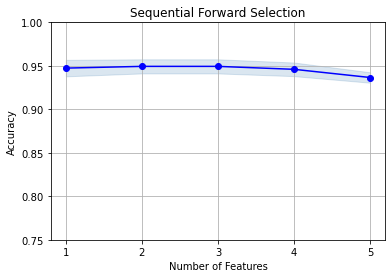

('Animal Type', 'Sex Upon Outcome', 'Normalized Age', 'Breed', 'Color')


In [29]:
#Plotting the SFS to show the point at which the accuracy starts to decrease.
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

plot.ylim([0.75, 1])
plot.title('Sequential Forward Selection')
plot.grid()
plot.show()
print(sfs_forward.k_feature_names_)

#As we can see from the graph, the accuracy starts to decrease after the 3rd feature, that being Normalized Age.
#Therefore, the features that should be selected are Animal Type, Sex Upon Outcome and Normalized Age.

In [30]:
#Based on the above graph, we can eliminate the Breed and Color columns as they only decrease the overall accuracy. 
#Once we do this we can rerun the model with those columns excluded from the classification.

df_new = df.drop(columns = ["Breed", "Color"])

X_train, X_test, Y_train, Y_test = train_test_split(df_new, outcome, random_state=1)

#Fitting the KNN model to the training data now excluding the columns that decrease accuracy
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [31]:
# Predicting on the training dataset 
y_predicted = knn.predict(X_train)
accuracy = accuracy_score(Y_train, y_predicted)
print(accuracy)

0.9504


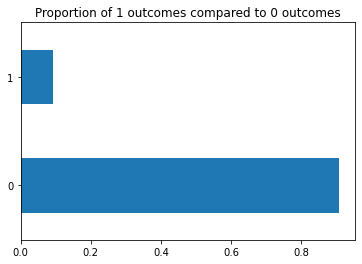

In [32]:
outcome.value_counts(normalize=True).plot.barh()
plot.title("Proportion of 1 outcomes compared to 0 outcomes");

#Based on the plotting of the outcomes, we can see that a vast majority of the outcomes are 0.
#With an accuracy score as high as 95%, it is likely that the model is only performing well in the cases where the majority 
#of the test data is 0. This might not be the case for the contrary example.

In [33]:
#If we now run a dummy classifier, we can see that the accuracy scores are pretty close, with the dummy classifier achieving a 
#91% and the actual model getting a 94% accuracy.

d_c = DummyClassifier(strategy="most_frequent")
d_c.fit(X_train, Y_train)
print("Dummy Classifier: " f"{d_c.score(X_test, Y_test):.3f}")
print("Old Classifier: " f"{accuracy}")

Dummy Classifier: 0.910
Old Classifier: 0.9504


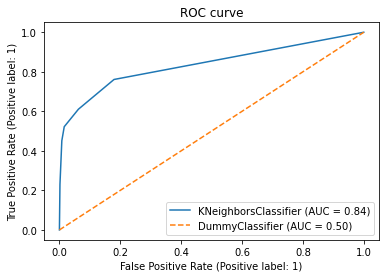

In [34]:
#As can be seen from the ROC curve below, the classification model produces results that are substantially better than the 
#Dummy classifier. As the False Positive Rate is 0, the True Positive Rate is also high and remains above the 50% line 
#consistently as the False Positive Rate increases.

disp = plot_roc_curve(knn, X_test, Y_test, pos_label=1)
disp = plot_roc_curve(d_c, X_test, Y_test, pos_label=1, color="tab:orange", linestyle="--", ax=disp.ax_)
disp.ax_.set_title("ROC curve: KNN");

In [35]:
#Therefore, we will cross validate to ensure that our model isn't just getting lucky/unlucky with its training data
#and that it actually can perform well for any variety of training data.
#We will shuffle 10 times before creating the folds.
cross_val = KFold(n_splits=10, shuffle=False, random_state=None)

In [36]:
#We will now rerun the tests with the folds included to produce the most fair outcome and the real accuracy of the model using
#this dataset.
#The result is closer to the true accuracy of the model.
results = cross_validate(knn, df_new, outcome, cv=cross_val, scoring='balanced_accuracy')
test_score = results["test_score"]
print("True Accuracy: "f"{test_score.mean():.3f}")

True Accuracy: 0.743


# Decision Tree

### Splitting data into test and train 

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(df, outcome, random_state=1)

## Decision Tree

In [38]:
#Fitting the Decision Tree model to the training data
dc = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [39]:
#Applying the Sequential Forward Selection to the Decision Tree features.
sfs_forward = SFS(dc, 
                  k_features=5, 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(df, outcome, custom_feature_names=df.columns)

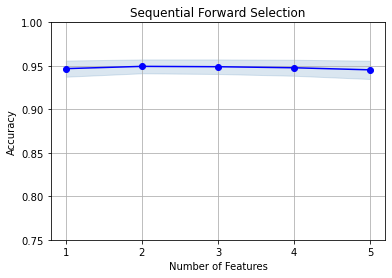

('Animal Type', 'Sex Upon Outcome', 'Normalized Age', 'Breed', 'Color')


In [40]:
#Plotting the SFS to show the point at which the accuracy starts to decrease.
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

plot.ylim([0.75, 1])
plot.title('Sequential Forward Selection')
plot.grid()
plot.show()
print(sfs_forward.k_feature_names_)

#As we can see from the graph, the accuracy starts to decrease after the 4th feature, that being Breed. 
#Therefore, the features that should be selected are Animal Type, Sex Upon Outcome, Normalized Age and Breed.

In [41]:
#Based on the above graph, we can eliminate the Color column as it only decreases the overall accuracy. 
#Once we do this we can rerun the model with those columns excluded from the classification.

df_new = df.drop(columns = "Color")

X_train, X_test, Y_train, Y_test = train_test_split(df_new, outcome, random_state=1)

#Fitting the KNN model to the training data now excluding the columns that decrease accuracy
dc = DecisionTreeClassifier()
dc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [42]:
# Predict on the training dataset 
y_predicted = dc.predict(X_train)
accuracy = accuracy_score(Y_train, y_predicted)
print(accuracy)

0.992


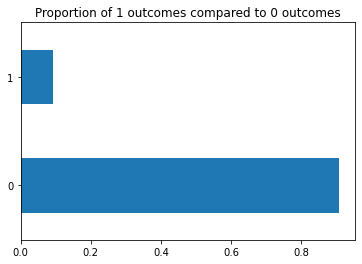

In [43]:
outcome.value_counts(normalize=True).plot.barh()
plot.title("Proportion of 1 outcomes compared to 0 outcomes");

#Based on the plotting of the outcomes, we can see that a vast majority of the outcomes are 0.
#With an accuracy score as high as 99%, it is likely that the model is only performing well in the cases where the majority 
#of the test data is 0. This might not be the case for the contrary example.

In [44]:
#If we now run a dummy classifier, we can see that the accuracy scores are pretty close, with the dummy classifier achieving a 
#91% and the actual model getting a 99% accuracy.

d_c = DummyClassifier(strategy="most_frequent")
d_c.fit(X_train, Y_train)
print("Dummy Classifier: " f"{d_c.score(X_test, Y_test):.3f}")
print("Old Classifier: " f"{accuracy}")

Dummy Classifier: 0.910
Old Classifier: 0.992


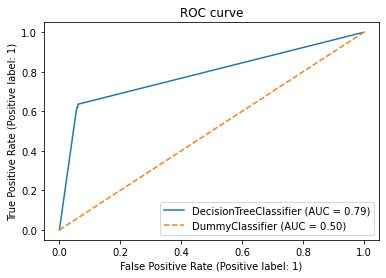

In [45]:
#As can be seen from the ROC curve below, the classification model produces results that are substantially better than the 
#Dummy classifier. As the False Positive Rate is 0, the True Positive Rate is also high and remains above the 50% line 
#consistently as the False Positive Rate increases.

disp = plot_roc_curve(dc, X_test, Y_test, pos_label=1)
disp = plot_roc_curve(d_c, X_test, Y_test, pos_label=1, color="tab:orange", linestyle="--", ax=disp.ax_)
disp.ax_.set_title("ROC curve: Decision Tree");

In [46]:
#Therefore, we will cross validate to ensure that our model isn't just getting lucky/unlucky with its training data
#and that it actually can perform well for any variety of training data.
#We will shuffle 10 times before creating the folds.
cross_val = KFold(n_splits=10, shuffle=False, random_state=None)

In [47]:
#We will now rerun the tests with the folds included to produce the most fair outcome and the real accuracy of the model using
#this dataset.
#The result is closer to the true accuracy of the model.
results = cross_validate(dc, df_new, outcome, cv=cross_val, scoring='balanced_accuracy')
test_score = results["test_score"]
print("True Accuracy: "f"{test_score.mean():.3f}")

True Accuracy: 0.766


# Naive Bayes

### Splitting data into test and train 

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(df, outcome, random_state=1)

## Naive Bayes

In [49]:
#Fitting the Naive Bayes model to the training data
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [50]:
#Applying the Sequential Forward Selection to the Naive Bayes features.
sfs_forward = SFS(gnb, 
                  k_features=5, 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(df, outcome, custom_feature_names=df.columns)

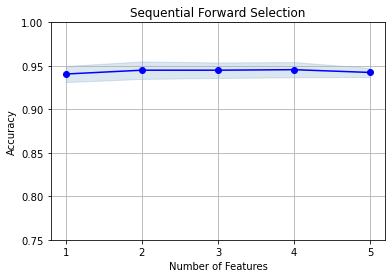

('Animal Type', 'Sex Upon Outcome', 'Normalized Age', 'Breed', 'Color')


In [51]:
#Plotting the SFS to show the point at which the accuracy starts to decrease.
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

plot.ylim([0.75, 1])
plot.title('Sequential Forward Selection')
plot.grid()
plot.show()
print(sfs_forward.k_feature_names_)

#As we can see from the graph, the accuracy starts to decrease after the 4th feature, that being Color.
#Therefore, the features that should be selected are Animal Type, Sex Upon Outcome, Normalized Age and Breed.

In [52]:
#Based on the above graph, we can eliminate the Color column as it only decreases the overall accuracy. 
#Once we do this we can rerun the model with those columns excluded from the classification.

df_new = df.drop(columns = "Color")

X_train, X_test, Y_train, Y_test = train_test_split(df_new, outcome, random_state=1)

#Fitting the KNN model to the training data now excluding the columns that decrease accuracy
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [53]:
#Predicting on the training dataset 
y_predicted = gnb.predict(X_train)
accuracy = accuracy_score(Y_train, y_predicted)
print(accuracy)

0.94


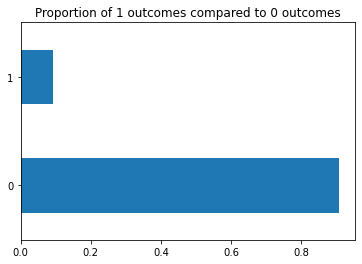

In [54]:
outcome.value_counts(normalize=True).plot.barh()
plot.title("Proportion of 1 outcomes compared to 0 outcomes");

#Based on the plotting of the outcomes, we can see that a vast majority of the outcomes are 0.
#With an accuracy score as high as 94%, it is likely that the model is only performing well in the cases where the majority 
#of the test data is 0. This might not be the case for the contrary example.

In [55]:
#If we now run a dummy classifier, we can see that the accuracy scores are pretty close, with the dummy classifier achieving a 
#91% and the actual model getting a 94% accuracy.

d_c = DummyClassifier(strategy="most_frequent")
d_c.fit(X_train, Y_train)
print("Dummy Classifier: " f"{d_c.score(X_test, Y_test):.3f}")
print("Old Classifier: " f"{accuracy}")

Dummy Classifier: 0.910
Old Classifier: 0.94


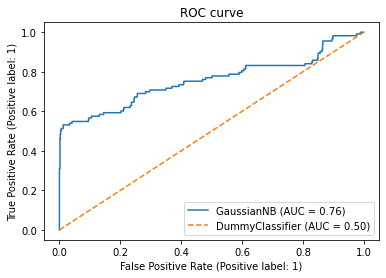

In [56]:
#As can be seen from the ROC curve below, the classification model produces results that are substantially better than the 
#Dummy classifier. As the False Positive Rate is 0, the True Positive Rate is also high and remains above the 50% line 
#consistently as the False Positive Rate increases. The graph dips as the True Positive Rate reaches 80% 
#but doesn't pass the 50% line.

disp = plot_roc_curve(gnb, X_test, Y_test, pos_label=1)
disp = plot_roc_curve(d_c, X_test, Y_test, pos_label=1, color="tab:orange", linestyle="--", ax=disp.ax_)
disp.ax_.set_title("ROC curve: Naive Bayes");

In [57]:
#Therefore, we will cross validate to ensure that our model isn't just getting lucky/unlucky with its training data
#and that it actually can perform well for any variety of training data.
#We will shuffle 10 times before creating the folds.
cross_val = KFold(n_splits=10, shuffle=False, random_state=None)

In [58]:
#We will now rerun the tests with the folds included to produce the most fair outcome and the real accuracy of the model using
#this dataset.
#The result is closer to the true accuracy of the model.
results = cross_validate(gnb, df_new, outcome, cv=cross_val, scoring='balanced_accuracy')
test_score = results["test_score"]
print("True Accuracy: "f"{test_score.mean():.3f}")

True Accuracy: 0.740


# SVM

### Splitting data into test and train

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(df, outcome, random_state=1)

## SVM

In [60]:
#Fitting the SVM model to the training data
svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)

SVC()

In [61]:
#Applying the Sequential Forward Selection to the SVM features.
sfs_forward = SFS(svm, 
                  k_features=5, 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(df, outcome, custom_feature_names=df.columns)

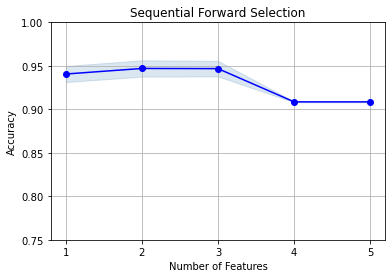

('Animal Type', 'Sex Upon Outcome', 'Normalized Age', 'Breed', 'Color')


In [62]:
#Plotting the SFS to show the point at which the accuracy starts to decrease.
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

plot.ylim([0.75, 1])
plot.title('Sequential Forward Selection')
plot.grid()
plot.show()
print(sfs_forward.k_feature_names_)

#As we can see from the graph, the accuracy starts to decrease after the 3rd feature, that being Normalized Age.
#Therefore, the features that should be selected are Animal Type, Sex Upon Outcome and Normalized Age

In [63]:
#Based on the above graph, we can eliminate the Breed and Color columns as they only decrease the overall accuracy. 
#Once we do this we can rerun the model with those columns excluded from the classification.

df_new = df.drop(columns = ["Breed", "Color"])

X_train, X_test, Y_train, Y_test = train_test_split(df_new, outcome, random_state=1)

#Fitting the KNN model to the training data now excluding the columns that decrease accuracy
svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)

SVC()

In [64]:
# Predict on the training dataset 
y_predicted = svm.predict(X_train)
accuracy = accuracy_score(Y_train, y_predicted)
print(accuracy)

0.9456


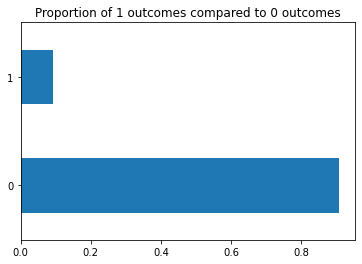

In [65]:
outcome.value_counts(normalize=True).plot.barh()
plot.title("Proportion of 1 outcomes compared to 0 outcomes");

#Based on the plotting of the outcomes, we can see that a vast majority of the outcomes are 0.
#With an accuracy score as high as 94%, it is likely that the model is only performing well in the cases where the majority 
#of the test data is 0. This might not be the case for the contrary example.

In [66]:
#If we now run a dummy classifier, we can see that the accuracy scores are pretty close, with the dummy classifier achieving a 
#91% and the actual model getting a 94% accuracy.

d_c = DummyClassifier(strategy="most_frequent")
d_c.fit(X_train, Y_train)
print("Dummy Classifier: " f"{d_c.score(X_test, Y_test):.3f}")
print("Old Classifier: " f"{accuracy}")

Dummy Classifier: 0.910
Old Classifier: 0.9456


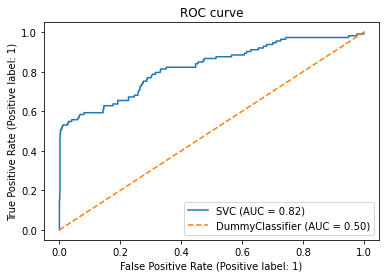

In [67]:
#As can be seen from the ROC curve below, the classification model produces results that are substantially better than the 
#Dummy classifier. As the False Positive Rate is 0, the True Positive Rate is also high and remains above the 50% line consistently 
#as the False Positive Rate increases.

disp = plot_roc_curve(svm, X_test, Y_test, pos_label=1)
disp = plot_roc_curve(d_c, X_test, Y_test, pos_label=1, color="tab:orange", linestyle="--", ax=disp.ax_)
disp.ax_.set_title("ROC curve: SVM");

In [68]:
#Therefore, we will cross validate to ensure that our model isn't just getting lucky/unlucky with its training data
#and that it actually can perform well for any variety of training data.
#We will shuffle 10 times before creating the folds.
cross_val = KFold(n_splits=10, shuffle=False, random_state=None)

In [69]:
#We will now rerun the tests with the folds included to produce the most fair outcome and the real accuracy of the model using
#this dataset.
#The result is closer to the true accuracy of the model.
results = cross_validate(svm, df_new, outcome, cv=cross_val, scoring='balanced_accuracy')
test_score = results["test_score"]
print("True Accuracy: "f"{test_score.mean():.3f}")

True Accuracy: 0.733


# Question 1

### (b)
The feature subsets produced by the filter and wrapper techniques don't have much variety between them. When running the filter technique, that being the Information Gain filter, we can see that the information gain is minimal. Therefore, it is probably wise to select the features that are above the 50% of the maximum value. Meanwhile, when performing the wrapper technique (Sequential Forward Search) we can observe that in the case of KNN and SVM, the best features to keep are Animal Type, Sex Upon Outcome and Normalized Age. Meanwhile, in the case of Decision Trees and Naive Bayes, it is best to include the Breed along with the data specified previously.

A way to potentially increase adoption rate is to specify other data regarding the pets such as the expected lifespan of each animal based on their type in order to improve the accuracy of the normalization of the age. The Animal Type can be made more specific to include the specific type of animal as opposed to "Other".

### (c)
The best classifier was the Decision Tree classifier with a 76.6% accuracy rate. The features used for this classifier were: Animal Type, Sex Upon Outcome, Normalized Age and Breed. These features were selected using the SFS wrapper technique. The data was cross validated in order to eliminate the possibility of the classifier getting lucky with the training data. This was discovered by running a dummy classifier and finding that the accuracy produced was similar to the initial model run. The data was shuffled 10 times before cross validating. Thus the produced efficiency of 76.6% is close to the true accuracy thanks to the cross validation.

### (d)
The best classifier was Decision Tree based on the ROC curve as the initial False Positive rate is low(>5%) for a high True Positive of over 60%. I am satisfied with this performance as the other classifiers performed slightly worse but had greater False Positive Rates when compared to Decision Tree.

### (e)
Overall, when reducing the number of features in the data set, the accuracy would increase overall and eventually begin to decrease following the 3rd/4th feature. We can see that consistently the Color feature performs poorly both in terms of Information Gain and Accuracy. This can be explained by the fact that the Color feature has many different options which couldn't be captured accurately by the Label Encoder. The Decision Tree performed the best in terms of overall Accuracy as well as False Positive to True Positive Rate which was to be expected as the dataset featured had a highly discriminating feature, that being Animal Type. The other classifiers performed as expected with all achieving an accuracy of between 73% and 75%.

# Question 2

### (a)
This situation can be explained by the fact that the data may have some unseen data biases. Such biases can include a majority 
of the outcome test data being male for example while the train data has mostly female candidates. This is a sign of overfitting the data. The testing accuracy can be improved by cross validating the data and splitting it into folds to obtain a more objective test set. To avoid this situation you should examine your dataset for biases as well as test against a dummy classifier after evaluating the model if a high accuracy is optained.

### (b)
The kernel trick in SVM is projecting the data onto a higher dimension. This data is non linear but after the projection, can be linearly separated by a plane. The reason that this works is due to Kernels. Kernels perform a dot product on a certain transformation of the data points xi and xj which projects the data onto a higher dimension. Eg: K(xi, xj) = Φ(xi).Φ(xj) where Φ 
is a transfomation applied to data points to increase their dimension. The kernel trick is important as it allows us to linearly separate data which couldn't be linearly separated before. If the data has a "cloud and ring" or any other kind of circular distribution, a polynomial kernel should be used. If the data is pretty evenly split already but has some outliers, a linear kernel can be utilized.

### (c)
The curse of dimensionality is an effect where the learning model is less efficient due to the data used having high dimensionality. If the data used has too much data, the dataset can become noisy and the accuracy will decrease as more features are added. Hence why the data needs to be examined to ensure that adding more features doesn't decrease the accuracy. The reason a KNN model might struggle with high dimensional data is that some features can create noise. In essence, unnecessary features might cause a neighbour to drift further away from its true value and thus decrease accuracy and cause noise among the plotted points. If after running a filter on the data the Classification Accuracy shows that the accuracy decreases after a certain number of features, we should remove some unnecessary features. Also if the feature doesn't have a high information gain, it is a good idea to remove it.

### (d)
The evaluation measures that should be used are precision and recall. They measure information retrieval provide insight into the correctness of our algorithm. Since the percentage of fraudulent transactions is quite small, the information gained from knowing how many results retrieved were relevant as well as the total amount of relevant results were retrieved is greater than getting the accuracy, the fraction of correct predictions.